# Approximation Methods

Interpolation
-------------

Given a set of *N* points $(x_i, y_i)$ with $i = 1, 2, …N$, we sometimes need a function $\hat{f}(x)$ which returns $y_i = f(x_i)$ where $x == x_i$, and which in addition provides some interpolation of the data $(x_i, y_i)$ for all $x$.

The function `y0 = scipy.interpolate.interp1d(x,y,kind=’..’)` does this interpolation based on splines of varying order. Note that the function `interp1d` returns *a function* `y0` which will then interpolate the x-y data for any given $x$ when called as $y0(x)$.

The code below demonstrates this, and shows the different interpolation kinds.

-22.506290966449022


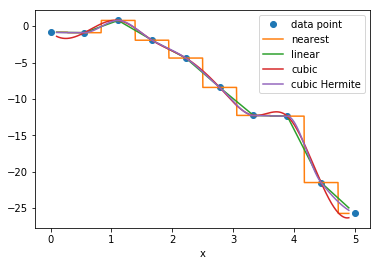

In [5]:
import numpy as np
import scipy.interpolate
import pylab
%matplotlib inline

def create_data(n):
    """Given an integer n, returns n data points
    x and values y as a numpy.array."""
    xmax = 5.
    x = np.linspace(0, xmax, n)
    y = - x**2
    #make x-data somewhat irregular
    y += 1.5 * np.random.normal(size=len(x))
    return x, y

#main program
n = 10
x, y = create_data(n)

#use finer and regular mesh for plot
xfine = np.linspace(0.1, 4.9, n * 100)
#interpolate with piecewise constant function (p=0)
y0 = scipy.interpolate.interp1d(x, y, kind='nearest')
#interpolate with piecewise linear func (p=1)
y1 = scipy.interpolate.interp1d(x, y, kind='linear')
#interpolate with piecewise constant func (p=3)
y3 = scipy.interpolate.interp1d(x, y, kind='cubic')
print(y3(4.5))
#interpolate with cubic Hermite
yfineH = scipy.interpolate.pchip_interpolate(x, y, xfine)

pylab.plot(x, y, 'o', label='data point')
pylab.plot(xfine, y0(xfine), label='nearest')
pylab.plot(xfine, y1(xfine), label='linear')
pylab.plot(xfine, y3(xfine), label='cubic')
pylab.plot(xfine, yfineH, label='cubic Hermite')
pylab.legend()
pylab.xlabel('x')

## Root finding

### Root finding using iterative relaxation method

Solution =  1.84140566044 , precision =  0.0


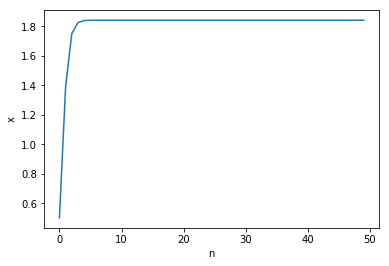

In [8]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline

def g(x):
    return 2-np.exp(-x)# np.cos(x)

nIter = 50

na = range(nIter)
xa = np.zeros(nIter)
x = 0.5 # initial guess
for k in na:
    xa[k] = x
    x = g(x)
    
plt.plot(na,xa)
plt.xlabel('n')
plt.ylabel('x')

print('Solution = ',xa[-1],', precision = ',np.abs(xa[-1]-xa[-2]))

### Root finding using the bisection method

First we introduce the `bisect` algorithm which is (i) robust and (ii) slow but conceptually very simple.

Suppose we need to compute the roots of *f*(*x*)=*x*<sup>3</sup> − 2*x*<sup>2</sup>. This function has a (double) root at *x* = 0 (this is trivial to see) and another root which is located between *x* = 1.5 (where *f*(1.5)= − 1.125) and *x* = 3 (where *f*(3)=9). It is pretty straightforward to see that this other root is located at *x* = 2. Here is a program that determines this root numerically:

In [9]:
from scipy.optimize import bisect

def f(x):
    """returns f(x)=x^3-2x^2. Has roots at
    x=0 (double root) and x=2"""
    return x ** 3 - 2 * x ** 2

# main program starts here
x = bisect(f, 1.5, 3, xtol=1e-6)

print("The root x is approximately x=%14.12g,\n"
      "the error is less than 1e-6." % (x))
print("The exact error is %g." % (2 - x))

The root x is approximately x= 2.00000023842,
the error is less than 1e-6.
The exact error is -2.38419e-07.


The `bisect()` method takes three compulsory arguments: (i) the function *f*(*x*), (ii) a lower limit *a* (for which we have chosen 1.5 in our example) and (ii) an upper limit *b* (for which we have chosen 3). The optional parameter `xtol` determines the maximum error of the method.

### Root finding using Brent method

This is a classic method to find a zero of the function f on the sign changing interval [a , b]. It is a safe version of the secant method that uses inverse quadratic extrapolation. Brent’s method combines root bracketing, interval bisection, and inverse quadratic interpolation.

In [10]:
from scipy.optimize import brentq

def f(x):
    return x ** 3 - 2 * x ** 2

x = brentq(f, 1.5, 3, xtol=1e-6)

print("The root x is approximately x=%14.12g,\n"
      "the error is less than 1e-6." % (x))
print("The exact error is %g." % (2 - x))

The root x is approximately x= 2.00000001896,
the error is less than 1e-6.
The exact error is -1.89583e-08.


### Root finding using the `fsolve` function

A (often) better (in the sense of “more efficient”) algorithm than the bisection algorithm is implemented in the general purpose `fsolve()` function for root finding of (multidimensional) functions. This algorithm needs only one starting point close to the suspected location of the root (but is not guaranteed to converge).

Here is an example:

In [14]:
from scipy.optimize import fsolve

def f(x):
    return x ** 3 - 2 * x ** 2

x = fsolve(f, [0,3,10,-7])           # look for two roots starting with 0 and 3

print("Number of roots is",len(x))
print("The root(s) are ",x)
%print("precision : ",x[0],x[1]-2)

Number of roots is 4
The root(s) are  [  0.00000000e+00   2.00000000e+00   2.00000000e+00  -3.00523490e-27]


UsageError: Line magic function `%print` not found.


The input to `fsolve` is the function and the array of initial locations for the roots. The return value of `fsolve` is a numpy array of length *n* for a root finding problem with *n* variables. In the example above, we have *n* = 2.